***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [Positional Astronomy](3_0_introduction.ipynb)
    * Previous: [Hour Angle and Local Sidereal Time](3_2_hour_angle.ipynb)
    * [Direction Cosine Coordinates](3_4_direction_cosine_coordinates.ipynb)

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
from IPython.display import HTML
HTML('../style/code_toggle.html')
import ephem
import matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


### Horizontal Coordinates (ALT/AZ)

In <a class="pos_sec_ha_hz"></a> <!--\ref{pos:sec:ha}--> we introduced the concept of an hour angle, which allows us to determine the time that still needs to elapse before a source crosses the local meridian. This however does not tell us where we should point a telescope on earth in order to observe a source with a specific hour angle. The *horizontal coordinates* *azimuth* $\mathcal{A}$ and *altitude* $\mathcal{E}$ (elevation) is used to enable an observer on earth to locate celestial objects in the observer's local sky. The observer's horizontal plane is the fundamental plane of this coordinate system and is known as the *celestial horizon*. The azimuth angle is measured in the celestial horizon from due north towards the east, while the altitude of a celestial object is the angle between it and the celestial horizon. Both azimuth and elevation are measured in degrees. The azimuth and elevation angle are depicted in <a class="pos_fig_hoz_hz"></a> <!--\ref{pos:fig:hoz}--> 

<a id='pos:fig:horizontal'></a> <!--\label{pos:fig:horizontal}--><img src='figures/horizontal.svg' width=40%>

*Figure 3.3.1*: The horizontal coordinates. <span style="background-color:cyan">KT:XX: Azimuth and elevation symbols seem to have been exchanged in the figure.</span> 

The equations below allow us to convert between equatorial and horizontal coordinates

<p class=conclusion>
  <font size=4><b> Converting between equatorial and horizontal </b></font>
  <br>
  <br>
\begin{eqnarray}
\cos\delta\cos H &=& \cos L_a\sin \mathcal{E} - \sin L_a\cos \mathcal{E}\cos \mathcal{A}\\
-\cos\delta\sin H&=& \cos \mathcal{E}\sin \mathcal{A}\\
\sin\delta &=& \sin L_a\sin \mathcal{E}+\cos L_a \cos \mathcal{E} \cos \mathcal{A} 
\end{eqnarray}
</p>

<div class=advice>
<b>Note:</b> In the conversion equations above $L_a$ denotes latitude (see <a class="pos_sec_eq_hz"></a> <!--\ref{pos:sec:eq}-->).
</div>

The above equations were derived by applying the spherical trigonometric identities in <a href='../2_Mathematical_Groundwork/2_13_spherical_trigonometry.ipynb'>$\S$ 2.13 &#10142;</a> to 
the triangle $\Delta PSZ$ which is depicted in <a class="pos_fig_conversion_hz"></a> <!--\ref{pos:fig:conversion}--> (see [Appendix &#10142;](../0_Introduction/2_Appendix.ipynb)).

<a id='pos:fig:conversion_alaz_radec'></a> <!--\label{pos:fig:conversion_alaz_radec}--><img src='figures/conversion.svg' width=40%>

*Figure 3.3.2*: The source-celestial pole-zenith triangle; which enables us to derive the conversion equations between horizontal and equatorial coordinates. The red plane represents the fundamental plane of the horizontal coordinate system, while the blue plane represents the 
fundamental plane of the celestial coordinate system. <span style="background-color:cyan">KT:XX: Where is the source located in the figure?</span> 

<div class=advice>
<b>Note:</b> The parallactic angle <span style="background-color:cyan">KT:GM:The parallactic angle needs to be in italics since this is its first appearance?</span> $q$ associated with a specific location on the celestial sphere $S$ is the angle between two great circles; the hour circle of $S$ and the great circle that passes through zenith and $S$. The parallactic angle $q$ is depicted in <a class="pos_fig_conversion_hz"></a> <!--\ref{pos:fig:conversion}--> 
The parallactic angle, and how it pertains to radio interferometry is discussed in more detail in <span style="background-color:cyan">KT:LF:Link to dead notebook</span> <a href='../7_Observing_Systems/7_7_antenna_mounts_and_parallactic_angle.ipynb'>$\S$ 7.7 &#10142;</a>.
</div>

### Examples

Let us cement the concpets we have learned in this section by once again making use of the  `pyephem` package. In this section we will use it to compute the horizontal coordinates for two primary use cases. In the first use case we plot the horizontal coordinates of a few randomly selected stars under the assumption that they are "observed" with KAT7. We will compute the horizontal coordinates of the selected stars for one entire day (2016/5/30). As we have already mentioned, the horizontal coordinates of the stars change during the course of one day, since the earth is rotating around its own axis. To achieve this we first create a `pyephem` observer object acting as a proxy for the KAT-7 array. Next we create `pyephem` body objects for the randomly selected stars. Each of the body objects has a method called `compute`. This `compute` method can take in an observer object. The compute method of the body object uses the geometrical location and the date attributes of the observer object to calculate the horizontal coordinates of the celestial body (in this case a star) the body object embodies. To track the change of the horizontal coordinates of stars (i.e. the stars we are interested in) we only need to iteratively call the compute methods of the body objects associated with them. Every time we call the compute method we just pass in an observer object with an appropriately altered date attribute. The code snippet below implements the above procedure. The altitude and azimuth angles of ten well known stars, calculated with `pyephem`, is depicted in <a class="pos_fig_alt_hz"></a> <!--\ref{pos:fig:alt}--> and <a class="pos_fig_az_hz"></a> <!--\ref{pos:fig:az}-->. 

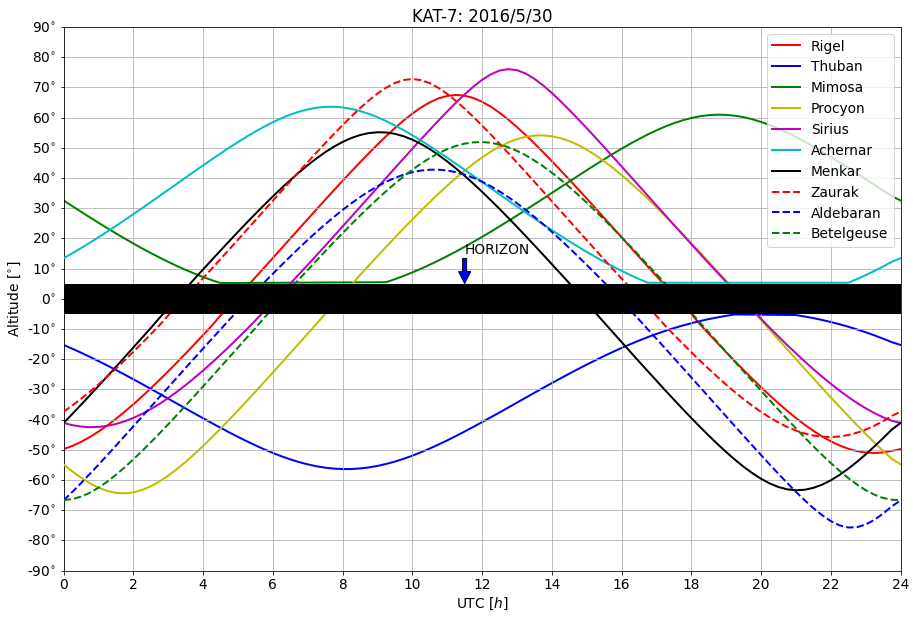

In [3]:
#Creating the observer: KAT-7
KAT7 = ephem.Observer() 
KAT7.lat = '-30:43:17'
KAT7.lon = '21:25:40.08'
KAT7.elevation = 0.0
KAT7.date = '2016/5/30 00:00:00' #UTC

#Creating the celestial bodies
star_names = np.array(["Rigel","Thuban","Mimosa","Procyon","Sirius","Achernar","Menkar","Zaurak","Aldebaran","Betelgeuse"])
star_objects = np.empty((len(star_names),),dtype=object)
for k in range(len(star_names)):
    star_objects[k] = ephem.star(star_names[k],KAT7) 


#Creating the time-strings at which we observe    
hours = np.empty((96,),dtype=object)
minutes = np.empty((96,),dtype=object)
alt_az_mat = np.zeros((len(star_names),len(hours)+1,2),dtype=float) #(sources,hours,horz_coord) 

hours_c = 0
for k in range(len(hours)):
   
    if k % 4 == 0:
       if hours_c < 10:
          hours[k] = '0'+str(hours_c)
       else:
          hours[k] = str(hours_c)
       minutes[k] = "00"
    elif k % 4 == 1:
       if hours_c < 10:
          hours[k] = '0'+str(hours_c)
       else:
          hours[k] = str(hours_c)
       minutes[k] = "15"
    elif k % 4 == 2:
       if hours_c < 10:
          hours[k] = '0'+str(hours_c)
       else:
          hours[k] = str(hours_c)
       minutes[k] = "30"
    elif k % 4 == 3:
       if hours_c < 10:
          hours[k] = '0'+str(hours_c)
       else:
          hours[k] = str(hours_c)
       hours_c = hours_c + 1
       minutes[k] = "45"
        
#Compute the alt/az for different stars observed by KAT-7 at different times on 2016/5/30         
for k in range(len(hours)):
    
    #Set new time
    n_date = '2016/5/30 ' + hours[k] + ':' + minutes[k] + ':00'
    
    KAT7.date = n_date
    
    #Calculate new alt/az
    for j in range(len(star_names)):
        star_objects[j].compute(KAT7)
        alt_az_mat[j,k,0] = float(star_objects[j].alt)
        alt_az_mat[j,k,1] = float(star_objects[j].az)

#Copy first value to last value 
alt_az_mat[:,-1,:] = alt_az_mat[:,0,:]         
time_v = np.linspace(0,24,len(hours)+1,endpoint=True) 

#Plot alt
matplotlib.rcParams.update({'font.size': 13.75})

fig, ax = plt.subplots()

c = ["r","b","g","y","m","c","k"]
l = ["-","--"]
l_ind = 0
c_ind = 0

for k in range(len(star_names)):
    if c_ind == 7:
       c_ind = 0
       l_ind = 1
        
    mask = np.logical_not(np.logical_and(alt_az_mat[k,:,0]*(180/np.pi)>-5,alt_az_mat[k,:,0]*(180/np.pi)<5))
    new_curve_y = alt_az_mat[k,mask,0]*(180/np.pi) 
    new_curve_x = time_v[mask]
    ax.plot(new_curve_x,new_curve_y,c[c_ind]+l[l_ind],label=star_names[k],lw=2,zorder=k)
    
    c_ind = c_ind +1


ax.fill_between(time_v, -5, 5, facecolor='k',alpha=1,zorder=k+1)
ax.annotate("HORIZON", xy = (11.5,5), xytext=(11.5, 15),arrowprops=dict(facecolor="b", shrink=1))
ax.legend()
ax.set_xlim([0,24])
ax.set_ylim([-90,90])
ticks = np.array([-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90])
plt.yticks(ticks)
ticks = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.xticks(ticks)
plt.xlabel("UTC [$h$]")
plt.ylabel("Altitude [$^{\circ}$]")
plt.title("KAT-7: 2016/5/30")

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = np.array(["-90$^{\circ}$","-80$^{\circ}$","-70$^{\circ}$","-60$^{\circ}$","-50$^{\circ}$","-40$^{\circ}$","-30$^{\circ}$","-20$^{\circ}$","-10$^{\circ}$","0$^{\circ}$","10$^{\circ}$","20$^{\circ}$","30$^{\circ}$","40$^{\circ}$","50$^{\circ}$","60$^{\circ}$","70$^{\circ}$","80$^{\circ}$","90$^{\circ}$"])
ax.set_yticklabels(labels)

ax.grid('on')

*Figure 3.3.3*: The altitude angle of ten well known stars during 2016/5/30 as observed by the KAT-7 array. The altitude angle was computed by employing `pyephem`. The peaks of the curves indicate the times at which the stars were at transit. The black rectangle represents the fundamental horizon<span style="background-color:cyan">KT:XX: What is the fundamental horizon? Do you mean the celestial horizon?</span> . Any star that stays below the horizon would not be observable at all (see the curve associated with *Thuban* for an example). Any star that stays above the horizon for the entire day is a circumpolar star. *Mimosa* can almost be classified as a circumpolar star.   <!--\label{pos:fig:alt}-->     

We have not yet plotted the azimuth coordinates for the randomly selected stars. We do so by using the code snippet below. 

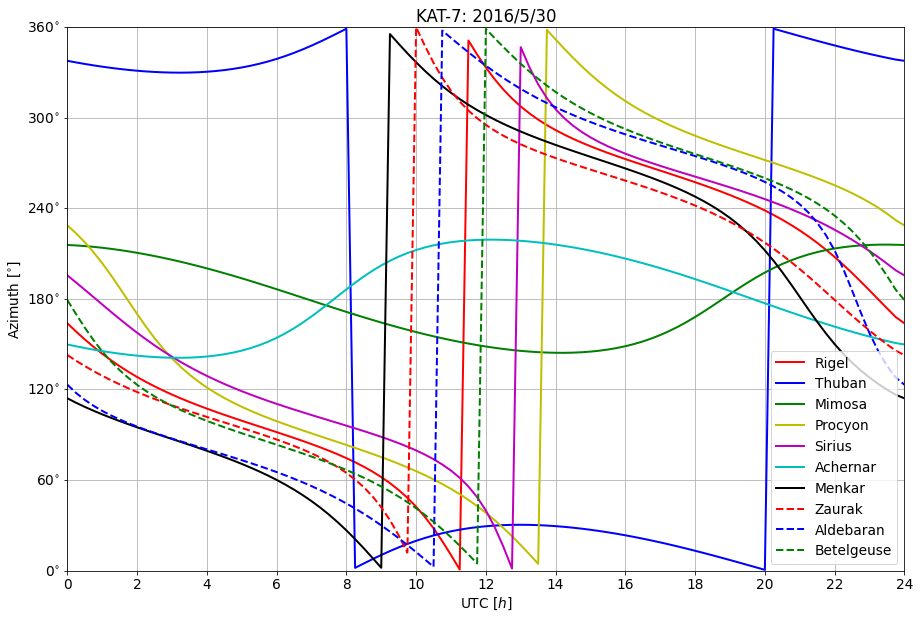

In [4]:
#Plot az
matplotlib.rcParams.update({'font.size': 13.75})
fig, ax = plt.subplots()

c = ["r","b","g","y","m","c","k"]
l = ["-","--"]
l_ind = 0
c_ind = 0

for i in range(10):
    if c_ind == 7:
       c_ind = 0
       l_ind = 1
    plt.plot(time_v,alt_az_mat[i,:,1]*(180/np.pi),c[c_ind]+l[l_ind],lw=2,label=star_names[i])
    c_ind = c_ind +1
    
ax.legend()
ax.set_xlim([0,24])
ax.set_ylim([0,360])
ticks = np.array([0,60,120,180,240,300,360])
plt.yticks(ticks)
ticks = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.xticks(ticks)
plt.xlabel("UTC [$h$]")
plt.ylabel("Azimuth [$^{\circ}$]")
plt.title("KAT-7: 2016/5/30")

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = np.array(["0$^{\circ}$","60$^{\circ}$","120$^{\circ}$","180$^{\circ}$","240$^{\circ}$","300$^{\circ}$","360$^{\circ}$"])
ax.set_yticklabels(labels)

ax.grid('on')

*Figure 3.3.4*: The azimuth angle of ten well know stars during 2016/5/30 as observed by the KAT-7 array. The azimuth angle was computed by employing `pyephem`.

In the second use case we determine the horizontal coordinates of *Betelgeuse*
for different arrays around the world at a specific moment in time (2016/5/30 00:00:00). We again use `pyephem` to accomplish this. See the code snippet below for the exact details of how this can be achieved. We plot the main result of the code snippet in <a class='pos_fig_hbetelgeuse_hz'></a> <!--\ref{pos:fig:hbetelgeuse}-->.

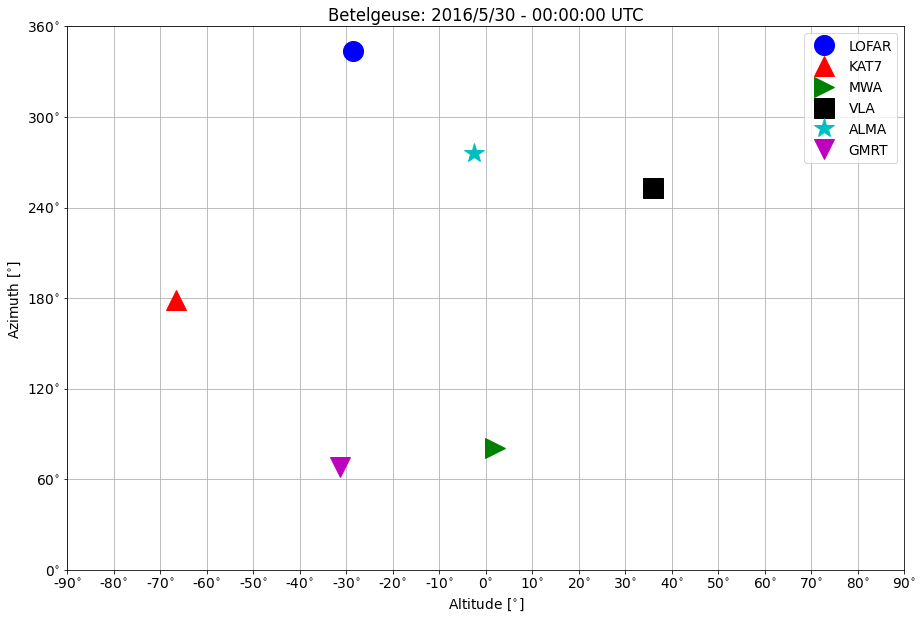

In [5]:
#Preliminaries
matplotlib.rcParams.update({'font.size': 13.75})
observatories = ["LOFAR","KAT7","MWA","VLA","ALMA","GMRT"]
lat_v = ["52:54:32","-30:43:17","-26:42:12","34:04:43","-23:01:09","19:05:47"]
lon_v = ["06:52:08","21:25:40.08","116:40:16","-107:37:05","-67:45:12","74:02:59"]

alt_az = np.zeros((len(observatories),2),dtype=float)

#Loading different observatories and calculating alt/az of Betelgeuse for each of them
for k in range(len(observatories)):
    obs = ephem.Observer() 
    obs.lat = lat_v[k]
    obs.lon = lon_v[k]
    obs.elevation = 0.0 
    obs.date = '2016/5/30 00:00:00' #UTC
    betelgeuse = ephem.star("Betelgeuse",obs)
    alt_az[k,0] = float(betelgeuse.alt)
    alt_az[k,1] = float(betelgeuse.az)
  
#Plotting
cluster = ['o','^','>','s','*','v']
col = ['b','r','g','k','c','m']

fig, ax = plt.subplots()

for xp, yp, m, n, col_v in zip(alt_az[:,0]*(180/np.pi), alt_az[:,1]*(180/np.pi), cluster, observatories,col):
    ax.plot([xp],[yp], marker=m, c = col_v, label = n, markersize = 20, linestyle='None')

ax.legend(numpoints=1)   
ax.set_xlim([-90,90])
ax.set_ylim([0,360])
ticks = np.array([0,60,120,180,240,300,360])
plt.yticks(ticks)
ticks = np.array([-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90])
plt.xticks(ticks)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = np.array(["0$^{\circ}$","60$^{\circ}$","120$^{\circ}$","180$^{\circ}$","240$^{\circ}$","300$^{\circ}$","360$^{\circ}$"])
ax.set_yticklabels(labels)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = np.array(["-90$^{\circ}$","-80$^{\circ}$","-70$^{\circ}$","-60$^{\circ}$","-50$^{\circ}$","-40$^{\circ}$","-30$^{\circ}$","-20$^{\circ}$","-10$^{\circ}$","0$^{\circ}$","10$^{\circ}$","20$^{\circ}$","30$^{\circ}$","40$^{\circ}$","50$^{\circ}$","60$^{\circ}$","70$^{\circ}$","80$^{\circ}$","90$^{\circ}$"])
ax.set_xticklabels(labels)

plt.xlabel("Altitude [$^{\circ}$]")
plt.ylabel("Azimuth [$^{\circ}$]")
plt.title("Betelgeuse: 2016/5/30 - 00:00:00 UTC")

ax.grid('on')

*Figure 3.3.5*: The horizontal coordinates of Betelgeuse for different arrays around the world on 2016/5/30 at 00:00:00 UTC. The horizontal coordinates were computed by employing `pyephem`.

***

Next: [Direction Cosine Coordinates](3_4_direction_cosine_coordinates.ipynb) 